# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd

student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [2]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

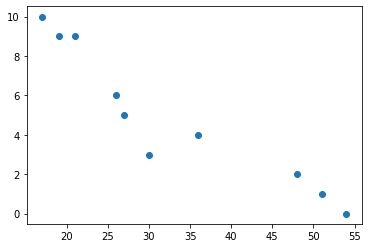

In [3]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data['X'], student_data['Y'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''
There seems to be a correlation between age and tardiness. 

Hypothesis: Tardiness is negatively correlated to age - the older the subject, the lower the number of tardies.
'''

'\nThere seems to be a correlation between age and tardiness. \n\nHypothesis: Tardiness is negatively correlated to age - the older the subject, the lower the number of tardies.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
from scipy import stats
import numpy as np

# https://realpython.com/numpy-scipy-pandas-correlation-python/#example-scipy-correlation-calculation

#correlation:

# using stats
# three methods of deriving the correlation
print(stats.pearsonr(student_data['X'], student_data['Y'])) # Pearson's r # only linear
print(stats.spearmanr(student_data['X'], student_data['Y'])) # Spearman's rho # may be multi-linear
print(stats.kendalltau(student_data['X'], student_data['Y'])) # Kendall Tau # may be multi-linear

# using Numpy
print(np.corrcoef(student_data['X'], student_data['Y'])) 
# corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients
# [[x,x x,y][y,x y,y]] 
# Pearson is default

# using Pandas
print(student_data['X'].corr(student_data['Y'])) # Pearson's r
print(student_data['X'].corr(student_data['Y'], method='spearman')) # Spearman's rho
print(student_data['X'].corr(student_data['Y'], method='kendall')) # Kendall Tau


#covariance:

# using Numpy
# https://numpy.org/doc/stable/reference/generated/numpy.cov.html
#https://www.geeksforgeeks.org/python-numpy-cov-function/
print(np.cov(student_data['X'], student_data['Y']))
#If COV(xi, xj) = 0 then variables are uncorrelated
#If COV(xi, xj) > 0 then variables positively correlated
#If COV(xi, xj) < 0 then variables negatively correlated
# returns COV[[x,x x,y][y,x y,y]]

# using pandas
# https://datatofish.com/covariance-matrix-python/
print(student_data.cov())


(-0.9391626886887121, 5.5666538345534396e-05)
SpearmanrResult(correlation=-0.9848069807617047, pvalue=2.2888344854823716e-07)
KendalltauResult(correlation=-0.9438798074485389, pvalue=0.00016213175204392636)
[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
-0.9391626886887122
-0.9848069807617047
-0.9438798074485389
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


In [6]:
# Difference between covariance and correlation
'''
Covariance: describes the direction of the relationship between two variables (whether there is 
a positive or a negative correlation). It does not describe the strength of this correlation.
The units in the covariance are absolute, hence measures with different scales and are not comparable.

Correlation: describes the correlation (positive or negative) and the strength of the relationship between 
two variables.
The units in correlation are relative -- they are standardized. All measures are comparable.
'''

# Camparison between the values and what they tell us in this case
'''
Covariance between X and Y: -45.566667
There is a negative relationship between the two variables.

Correlation (Pearson) between X and Y: -0.9391626886887121
There is a strong negative linear relationship between the two variables (nearly perfect negative correlation).

Correlation (Spearman) between X and Y: -0.9848069807617047
There is a strong monotonic (in the same direction) relationship between the two variables.

Kendall Tau is quite similar to Spearman, not as widely used. It gives the same information.

'''


'\nCovariance between X and Y: -45.566667\nThere is a negative relationship between the two variables.\n\nCorrelation (Pearson) between X and Y: -0.9391626886887121\nThere is a strong negative linear relationship between the two variables (nearly perfect negative correlation).\n\nCorrelation (Spearman) between X and Y: -0.9848069807617047\nThere is a strong monotonic (in the same direction) relationship between the two variables.\n\nKendall Tau is quite similar to Spearman, not as widely used. It gives the same information.\n\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here.

# https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation
# using stats

# Type of regression: Linear regression
# Y always changes by the same rate with constant change in X
# No differences in rate of change of Y with constant change of X
# (≠ classical example of pricing and profit, in which profits increase with higher price only up tp a certain point)
# i.e. the relationship between the two variables is linear
result = stats.linregress(student_data['X'],student_data['Y'])
print(result)

# Slope (aka gradient): the quantity of change (+ or -) that one can expect from a one unit increase in X. 
# Rate of change of Y with one unit increase in X.
print('The slope is', result.slope)

# Intercept (aka constant): the value at which the regression line crosses the y axis. The height of the line.
print('The intercept is', result.intercept)

#R value: pearson correlation coefficient (-1 and 1). It states the "quality of the fit".
print('The R-value is', result.rvalue)

#P value: The P-value is the probability that you would have found the current result if the correlation coefficient 
#were in fact zero (null hypothesis). If this probability is lower than the conventional 5% (P<0.05) the correlation 
#coefficient is called statistically significant.
# Measure of statistical significance of the data
print('The P-value is', result.pvalue)

# Standard error:
print('The standard error is', result.stderr)

# outcome variable:

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)
The slope is -0.2428207709159808
The intercept is 12.888803363135768
The R-value is -0.9391626886887121
The P-value is 5.56665383455343e-05
The standard error is 0.03139728816158607


Plot your regression model on your scatter plot.

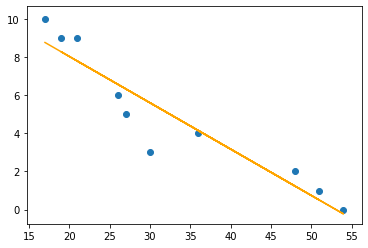

In [24]:
regression_line = results[0]*student_data['X'] + results[1]

plt.plot(student_data['X'], regression_line, c='orange')
plt.scatter(student_data['X'],student_data['Y'])
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
There is a linear negative correlation between age and tardiness. 

Increase in age correlates with decrease in tardiness.

Thus, age seems to be a predictor of tardiness.

Results of Pearson correlation (-0.9391626886887121) indicate that we can be confident in this result.

'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

vehicles = pd.read_csv('vehicles.csv')

In [26]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [27]:
vehicles.shape

(35952, 15)

In [28]:
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [30]:
# Your response here. 

correlation_matrix = vehicles.corr()
correlation_matrix

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [31]:

correlation_CO2 = correlation_matrix['CO2 Emission Grams/Mile']
correlation_CO2

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [32]:
correlation_CO2 = pd.DataFrame(correlation_CO2)
correlation_CO2

,CO2 Emission Grams/Mile
Year,-0.222300
Engine Displacement,0.803520
Cylinders,0.752393
Fuel Barrels/Year,0.986189
City MPG,-0.894139
Highway MPG,-0.926405
Combined MPG,-0.926229
CO2 Emission Grams/Mile,1.000000
Fuel Cost/Year,0.930865


In [33]:
# Keep only Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year

fields_to_drop = ['Engine Displacement', 'City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile']
correlation_CO2.drop(fields_to_drop, axis=0, inplace=True)

In [34]:
correlation_CO2

,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


In [ ]:
#input_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
#outcome_variable = ['CO2 Emission Grams/Mile']

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
# multi linear regression -> one dependent variable (y) but multiple independent variables (x)
# y = x1*a + x2*b + c
# this model is still a straight line, but has 2 inputs (x1, x2)

import statsmodels.api as sm

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                             15:39:15   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
